<a href="https://colab.research.google.com/github/m-sakh/Week2_Vision_Answers_MS/blob/main/Final_maybe_LinReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import print_function
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import glob
from matplotlib.patches import Rectangle
from scipy.stats import linregress
import matplotlib.patches as patches
from matplotlib.lines import Line2D

In [3]:
from google.colab import files
uploaded = files.upload()

Saving image33.png to image33.png
Saving image32.png to image32.png
Saving image31.png to image31.png
Saving image30.png to image30.png
Saving image29.png to image29.png
Saving image28.png to image28.png
Saving image27.png to image27.png
Saving image26.png to image26.png
Saving image25.png to image25.png
Saving image24.png to image24.png
Saving image23.png to image23.png
Saving image22.png to image22.png
Saving image21.png to image21.png
Saving image20.png to image20.png
Saving image19.png to image19.png
Saving image18.png to image18.png
Saving image17.png to image17.png
Saving image16.png to image16.png
Saving image15.png to image15.png
Saving image14.png to image14.png
Saving image13.png to image13.png
Saving image12.png to image12.png
Saving image11.png to image11.png
Saving image10.png to image10.png
Saving image9.png to image9.png
Saving image8.png to image8.png
Saving image7.png to image7.png
Saving image6.png to image6.png
Saving image5.png to image5.png
Saving image4.png to ima

In [4]:
# Make sure all the images are uploaded
downward = glob.glob("*.png")
downward.sort()
downward = [cv2.imread(s, cv2.IMREAD_GRAYSCALE) for s in downward]
print(f"{len(downward)} images in dataset")

33 images in dataset


In [5]:
def find_inliers(m, b, shape):
    height, width = shape

    # x = 0 (left edge), compute y
    x1 = 0
    y1 = m * x1 + b

    # x = width - 1 (right edge), compute y
    x2 = width
    y2 = m * x2 + b

    # Clip y values to stay within the image bounds
    y1 = max(0, min(height - 1, int(round(y1))))
    y2 = max(0, min(height - 1, int(round(y2))))

    return (x1, x2, y1, y2)

def calculate_regression(points): # input is the result of np.argwhere
    # convert points to float
    points = points.astype(float) #TODO (see astype, https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.astype.html)

    xs = points[:, 1] #TODO
    ys = points[:, 0] #TODO
    x_mean = np.mean(xs)
    y_mean = np.mean(ys)

    xy_mean =  np.mean(xs * ys)

    x_squared_mean = np.mean(xs * xs)

    m = (xy_mean - x_mean * y_mean) / (x_squared_mean - x_mean ** 2)

    b = y_mean - m * x_mean

    return (m,b)

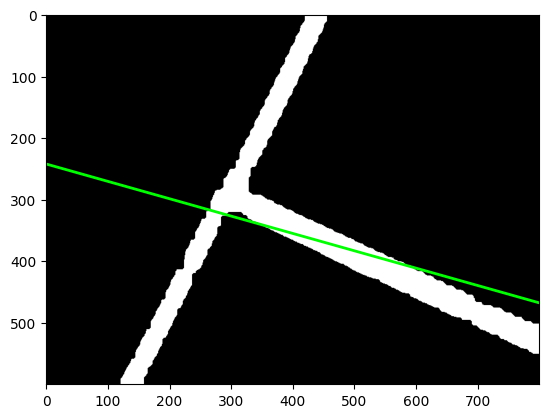

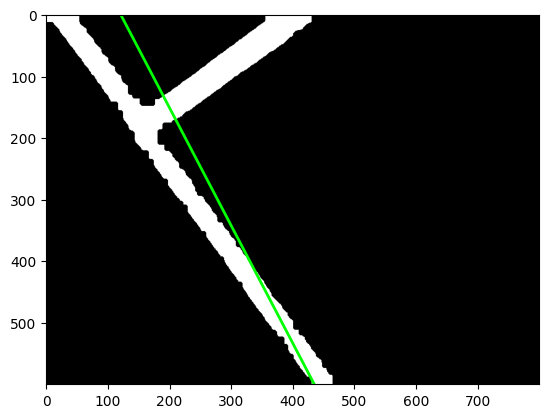

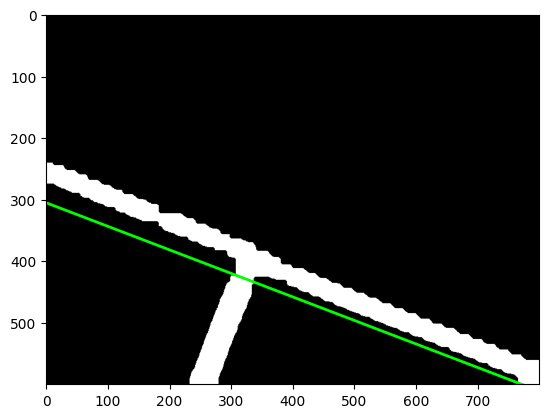

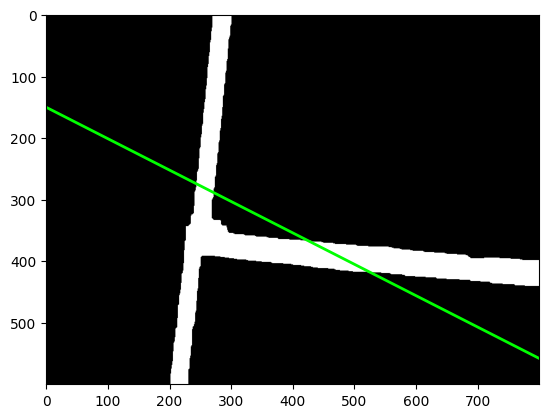

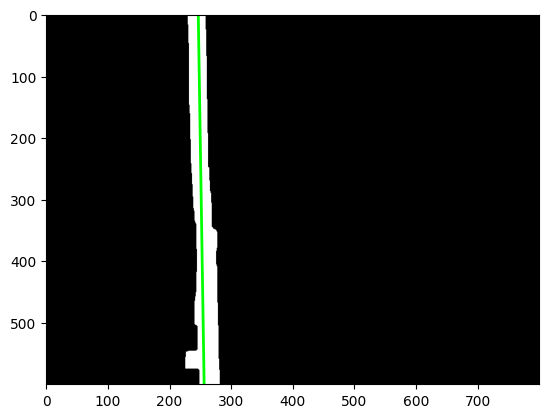

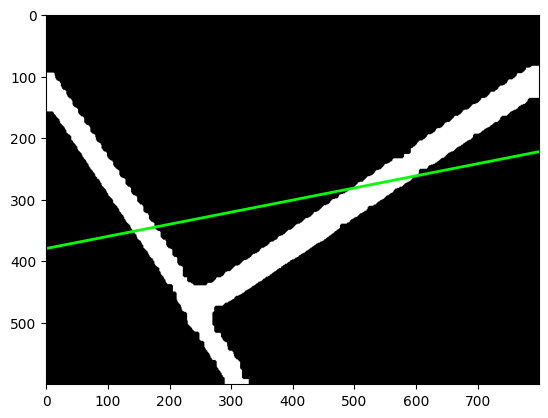

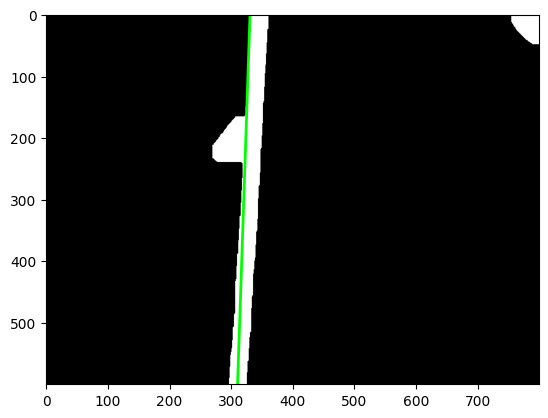

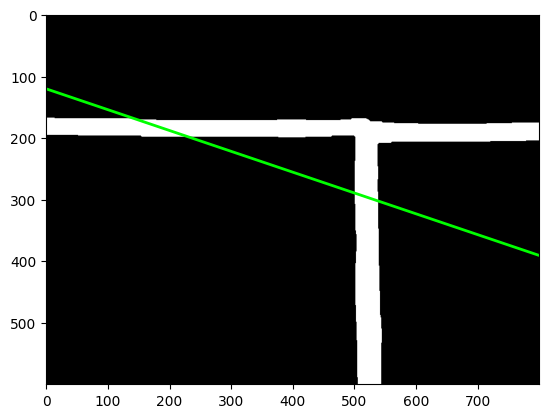

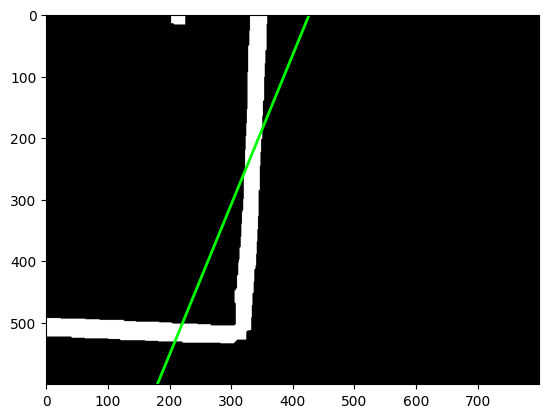

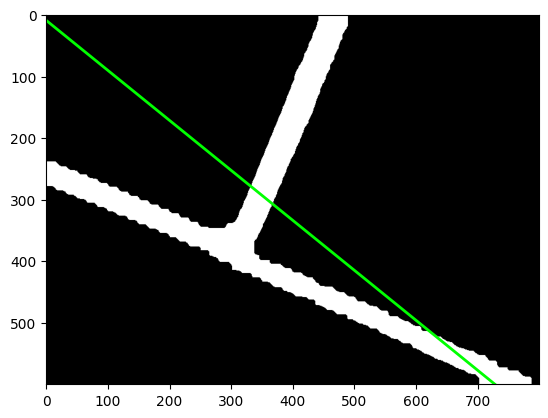

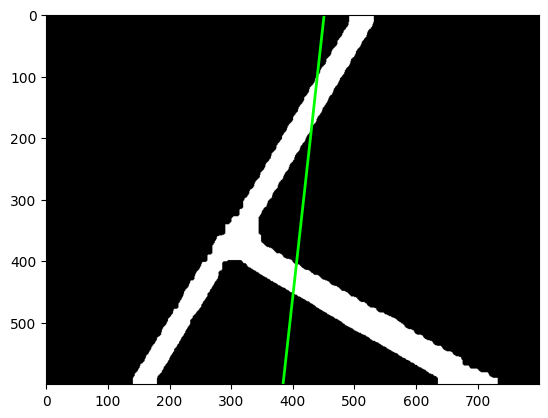

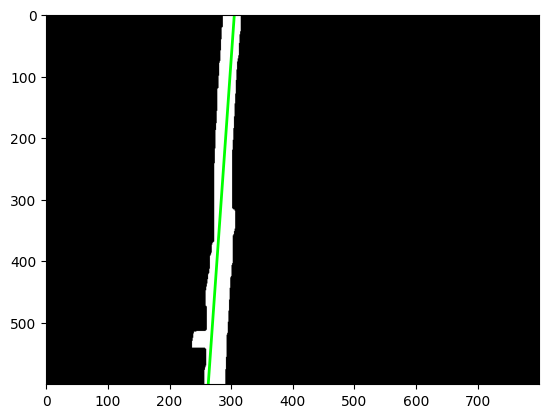

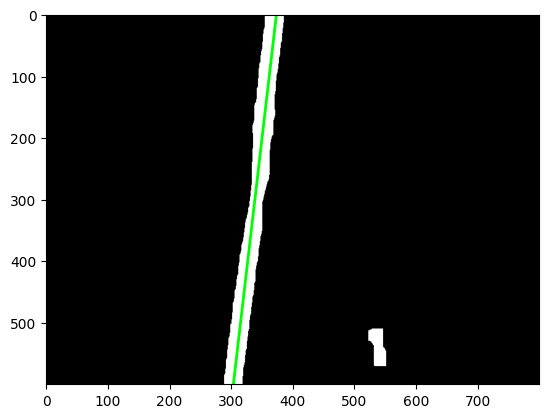

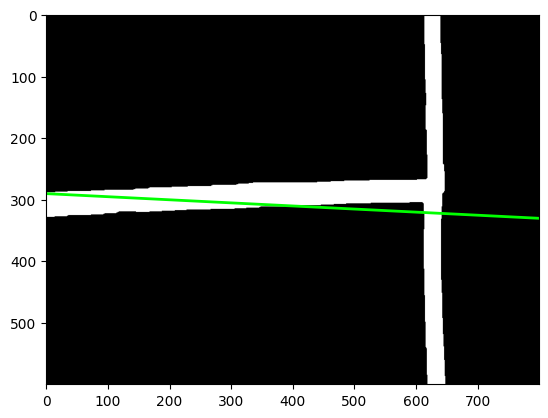

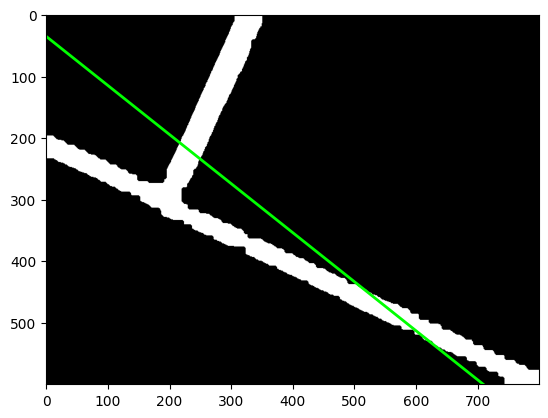

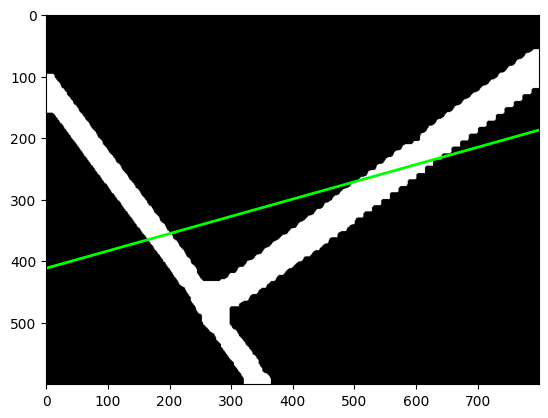

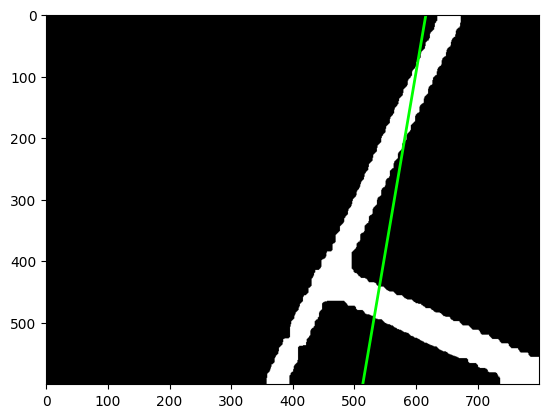

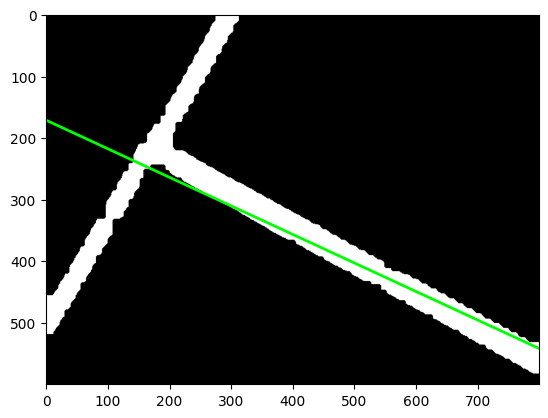

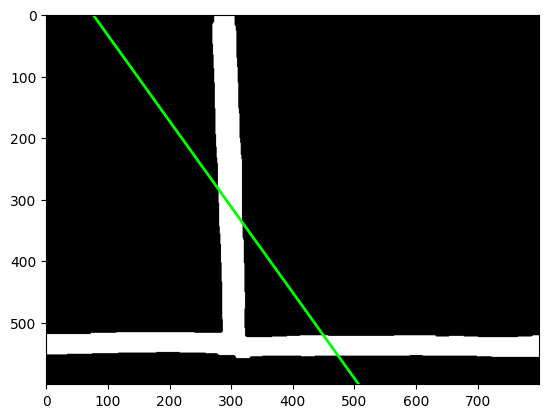

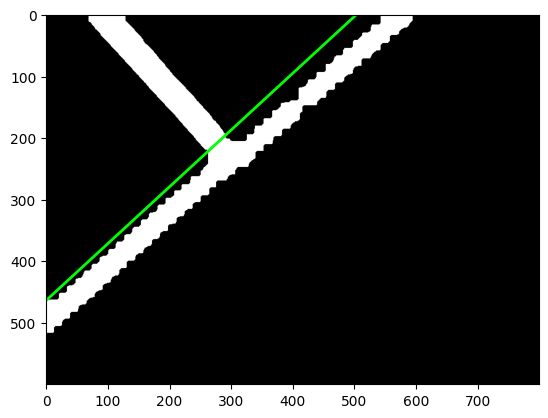

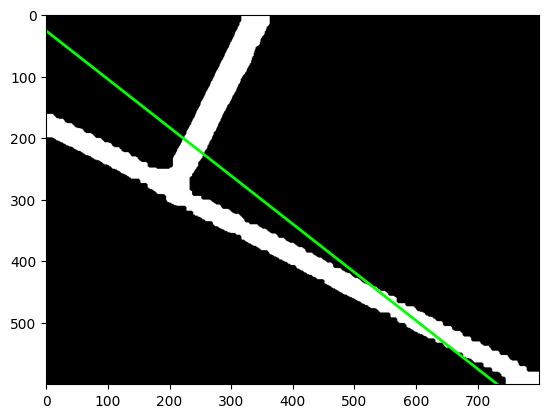

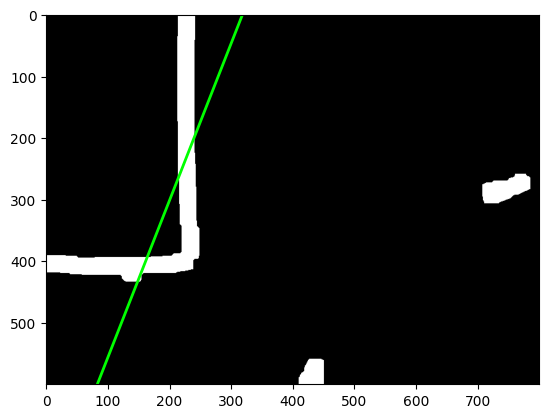

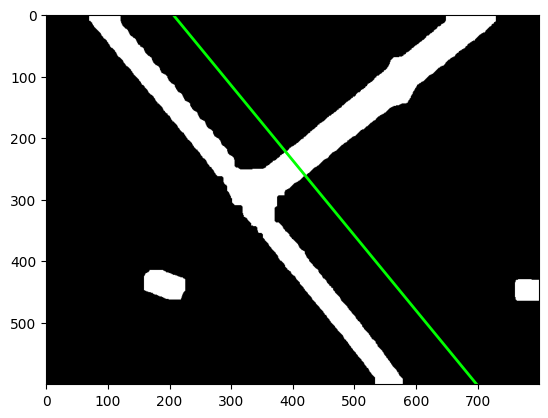

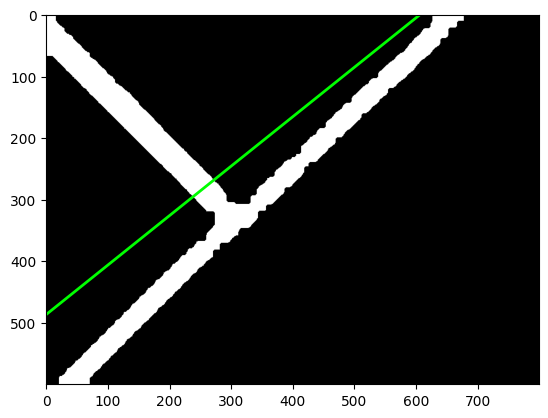

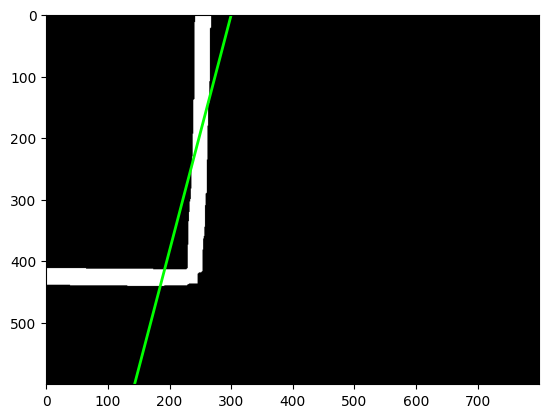

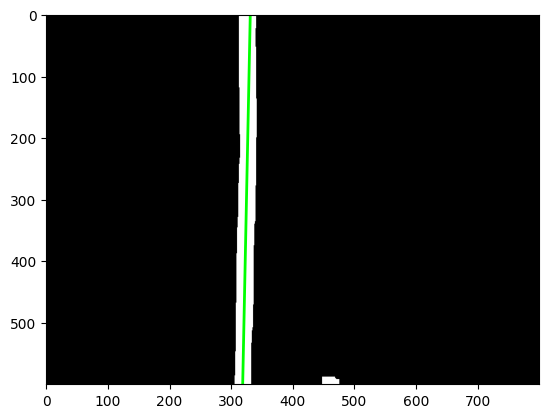

In [7]:
# File names
folderpath = "day1campi/"
imagepaths = glob.glob(os.path.join(folderpath, "*.png"))

kernel = np.ones((5, 5),np.uint8)
pimages = []

# Loads the images from the filenames



LOW = np.array([250, 250, 250])  # Lower image thresholding bound
HI = np.array([255, 255, 255])   # Upper image thresholding bound

kernel_size = 40
kernel = np.ones((kernel_size,kernel_size), np.uint8)

kernel_size = 20
kernel2 = np.ones((kernel_size,kernel_size), np.uint8)

pimages = []

for path in imagepaths:
    image = cv2.imread(path)

    image = cv2.dilate(image, kernel, iterations = 1)
    image = cv2.erode(image, kernel2, iterations = 1)

    # Apply white mask to filter out external colors
    mask = cv2.inRange(image, LOW, HI)
    image = cv2.bitwise_and(image, image, mask=mask)

    # Edit1 start
    image = cv2.GaussianBlur(image, (5,5), 0)
    # Edit1 end

    # Convert Image to binary
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, image = cv2.threshold(image,245,255,cv2.THRESH_BINARY)

    # Filter out small-spaced out pixels and contours that are too small
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    cnt_sort = lambda cnt: (max(cv2.minAreaRect(cnt)[1])) # sort by largest height/width

    sorted_contours = sorted(contours, key=cnt_sort, reverse=True)

    # Create the line

    if len(sorted_contours) == 0:
        continue

    all_points = np.vstack(sorted_contours[0])
    [vx, vy, x, y] = cv2.fitLine(all_points, cv2.DIST_L2, 0, 0.01, 0.01)
    x, y, vx, vy = x.item(), y.item(), vx.item(), vy.item()


    rows, cols = image.shape
    left_y = int((-x * vy / vx) + y)
    right_y = int(((cols - x) * vy / vx) + y)

    fig, ax = plt.subplots()
    ax.imshow(image, cmap='gray')

    regression_line = Line2D([0, cols - 1], [left_y, right_y], color='lime', linewidth=2)
    ax.add_line(regression_line)

    plt.show()

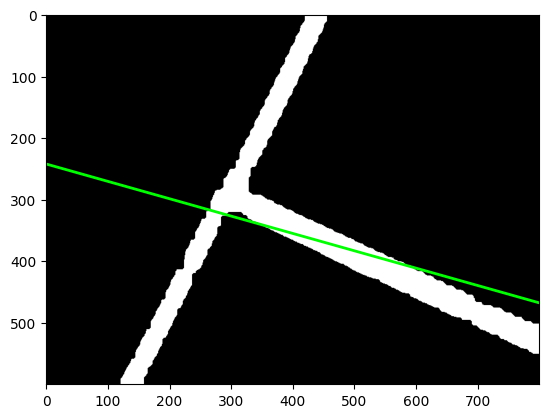

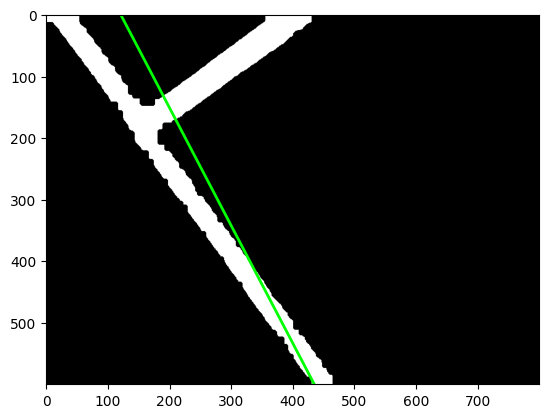

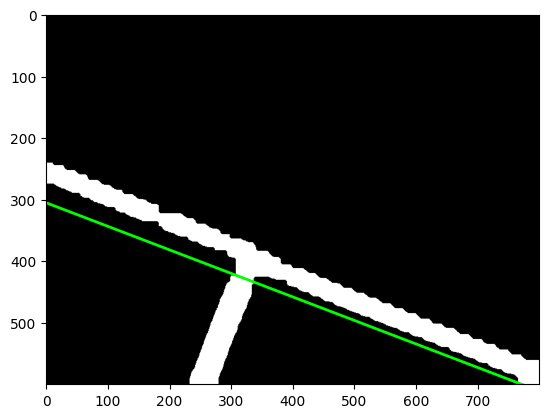

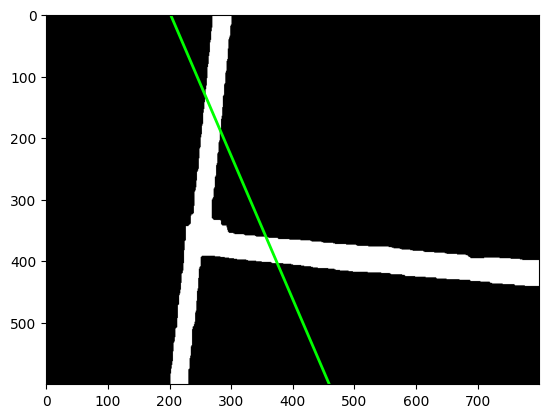

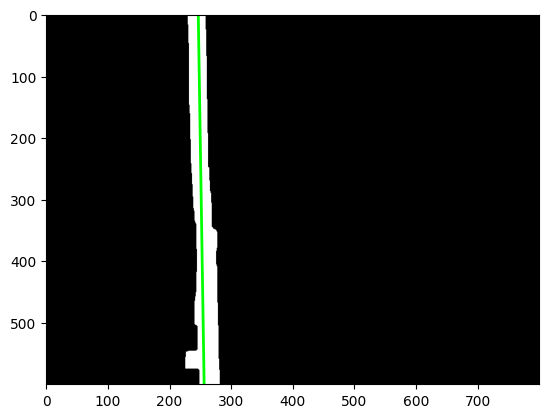

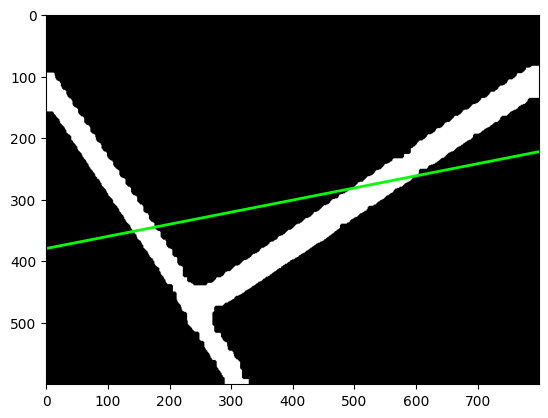

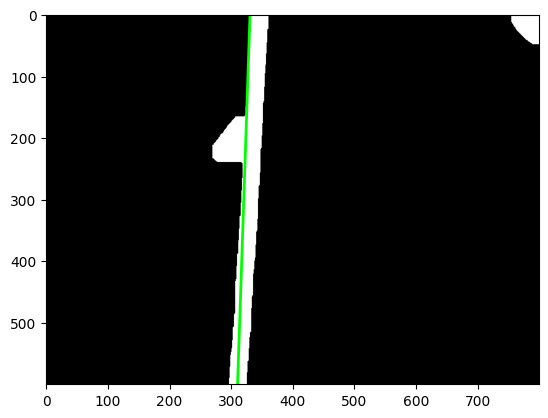

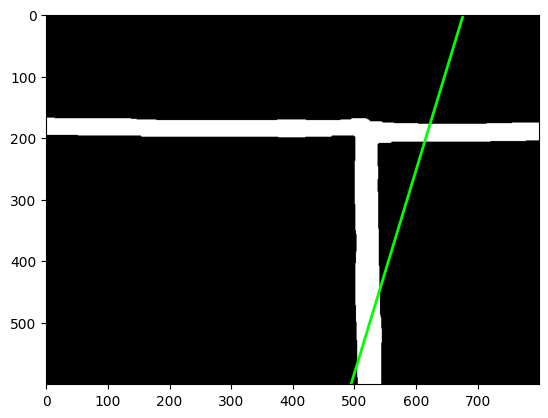

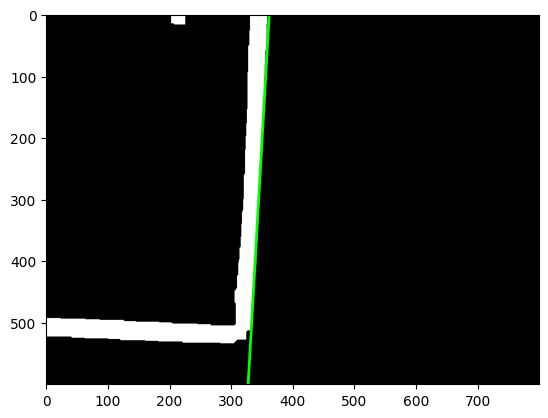

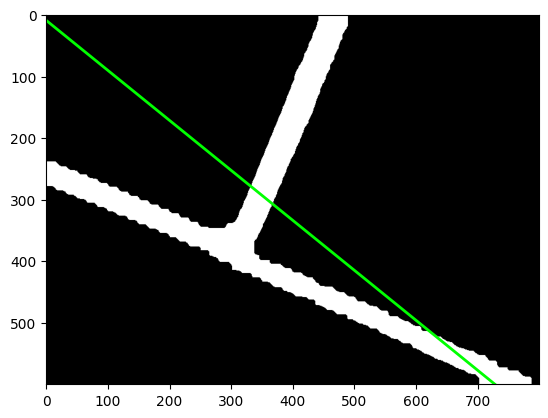

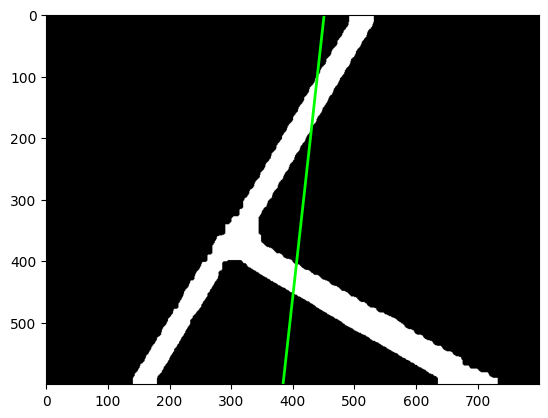

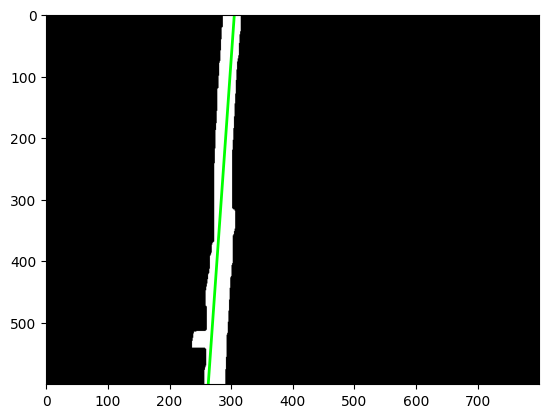

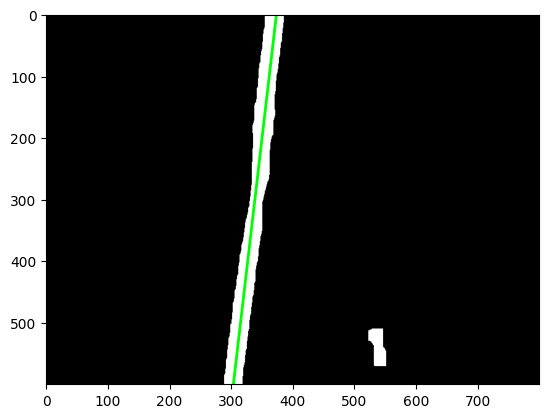

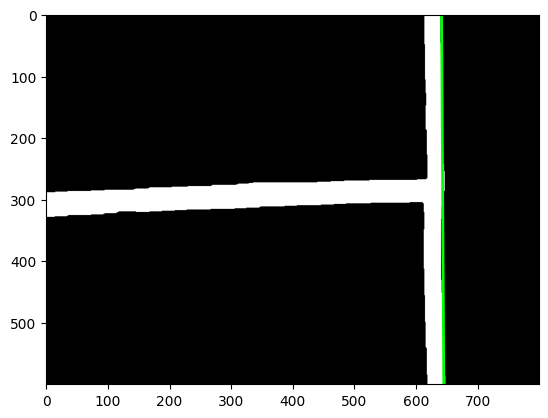

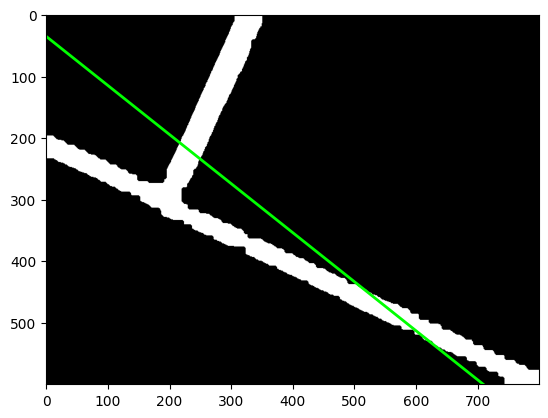

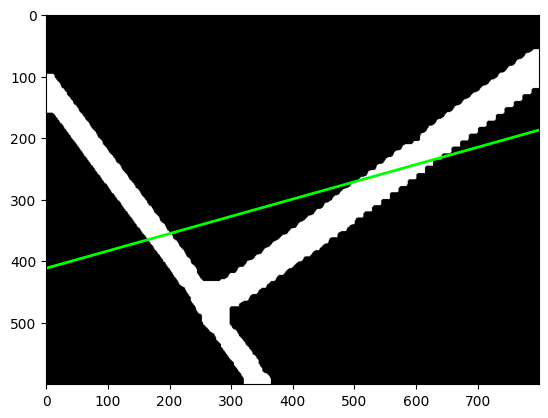

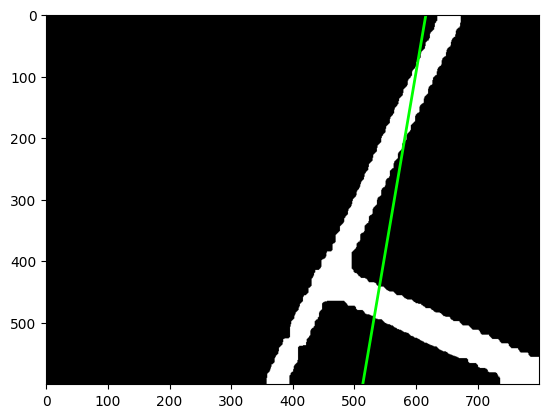

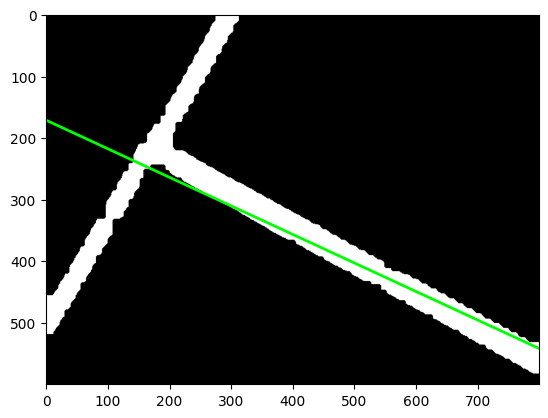

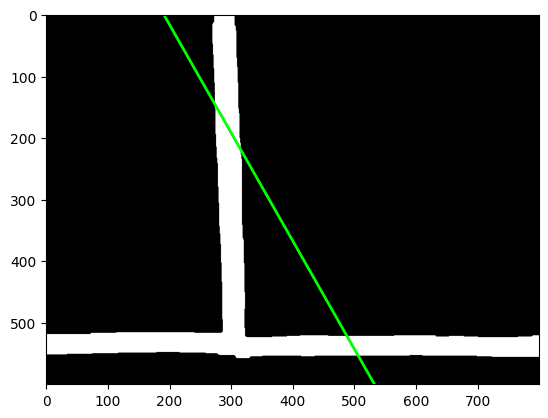

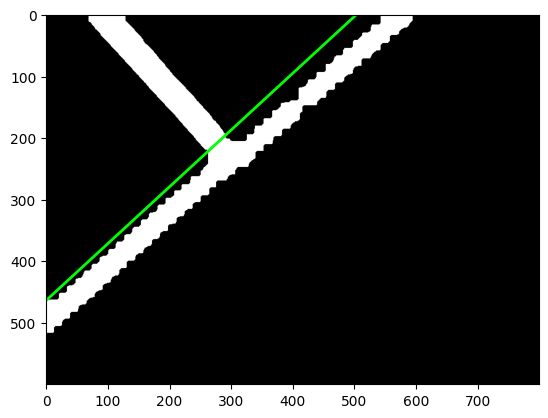

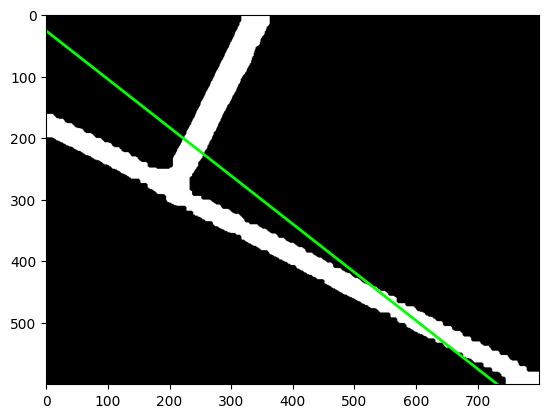

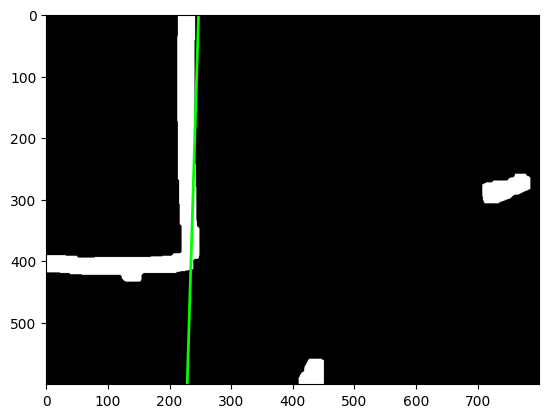

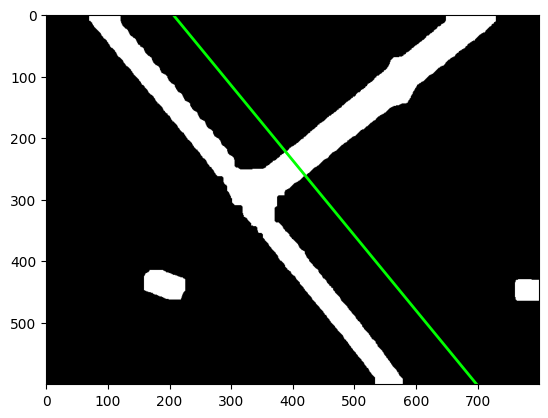

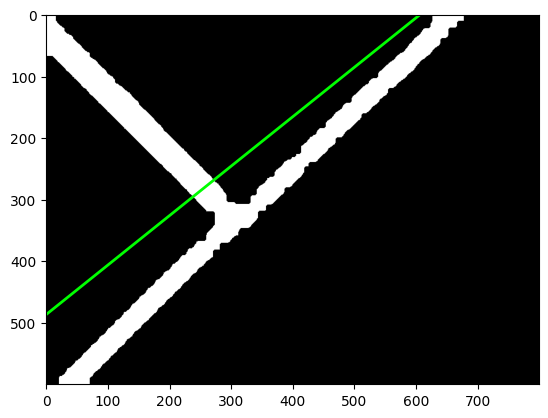

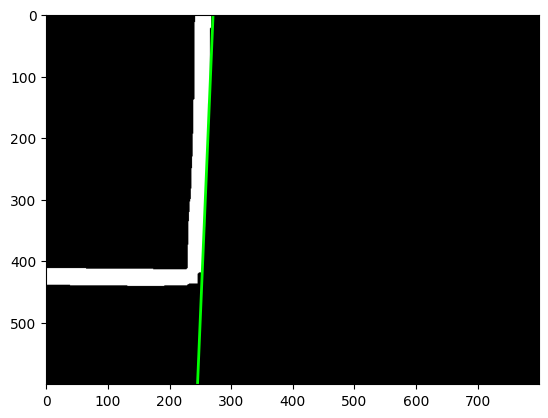

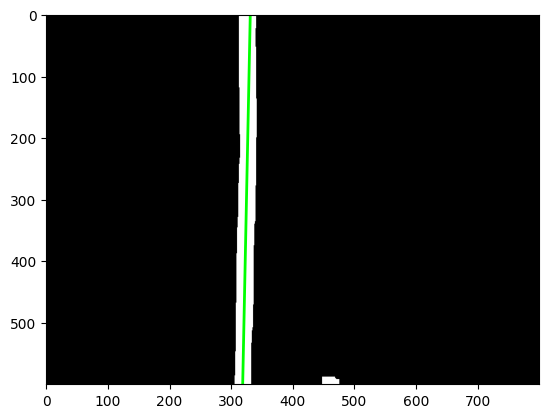

In [ ]:
# File names
folderpath = "day1campi/"
imagepaths = glob.glob(os.path.join(folderpath, "*.png"))

kernel = np.ones((5, 5),np.uint8)
pimages = []

# Loads the images from the filenames
def get_rightmost_boundary_pixels(contour, image_shape):
        """
        Get rightmost boundary pixels by creating a mask and scanning from right to left.
        
        Args:
            contour: OpenCV contour
            image_shape: (height, width) of the image
        
        Returns:
            List of (x, y) tuples representing rightmost boundary pixels
        """
        # Create mask from contour
        mask = np.zeros(image_shape, dtype=np.uint8)
        cv2.drawContours(mask, [contour], -1, 255, -1)
        
        rightmost_pixels = []
        height, width = image_shape
    
        # For each row, find the rightmost white pixel
        for y in range(height):
            row = mask[y, :]
            rightmost_x = np.where(row == 255)[0]
            if len(rightmost_x) > 0:
                rightmost_pixels.append((int(rightmost_x[-1]), y))
        
        if len(rightmost_pixels) < 2:
            return None
    
        # Convert to numpy array format for cv2.fitLine
        points = np.array(rightmost_pixels, dtype=np.float32)
        
        return points


LOW = np.array([250, 250, 250])  # Lower image thresholding bound
HI = np.array([255, 255, 255])   # Upper image thresholding bound

kernel_size = 40
kernel = np.ones((kernel_size,kernel_size), np.uint8)

kernel_size = 20
kernel2 = np.ones((kernel_size,kernel_size), np.uint8)

pimages = []

for path in imagepaths:
    image = cv2.imread(path)

    image = cv2.dilate(image, kernel, iterations = 1)
    image = cv2.erode(image, kernel2, iterations = 1)

    # Apply white mask to filter out external colors
    mask = cv2.inRange(image, LOW, HI)
    image = cv2.bitwise_and(image, image, mask=mask)

    # Edit1 start
    image = cv2.GaussianBlur(image, (5,5), 0)
    # Edit1 end

    # Convert Image to binary
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, image = cv2.threshold(image,245,255,cv2.THRESH_BINARY)

    # Filter out small-spaced out pixels and contours that are too small
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    cnt_sort = lambda cnt: (max(cv2.minAreaRect(cnt)[1])) # sort by largest height/width

    sorted_contours = sorted(contours, key=cnt_sort, reverse=True)

    if len(sorted_contours) == 0:
        continue

    edges = cv2.Canny(image, 50, 150)

    lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=50, minLineLength=40, maxLineGap=10)

    angle_buckets = {'horizontal': 0, 'vertical': 0}

    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            angle = np.arctan2(y2 - y1, x2 - x1) * 180 / np.pi

            if abs(angle) < 20 or abs(angle) > 160:
                angle_buckets['horizontal'] += 1
            elif 70 < abs(angle) < 110:
                angle_buckets['vertical'] += 1

    # Create the line

    if angle_buckets['horizontal'] > 0 and angle_buckets['vertical'] > 0:
        points = get_rightmost_boundary_pixels(sorted_contours[0], image.shape)
    # all_points = np.vstack(sorted_contours[0])
    else:
        points = np.vstack(sorted_contours[0])

    [vx, vy, x, y] = cv2.fitLine(points, cv2.DIST_L2, 0, 0.01, 0.01)
    x, y, vx, vy = x.item(), y.item(), vx.item(), vy.item()


    rows, cols = image.shape
    left_y = int((-x * vy / vx) + y)
    right_y = int(((cols - x) * vy / vx) + y)

    fig, ax = plt.subplots()
    ax.imshow(image, cmap='gray')

    regression_line = Line2D([0, cols - 1], [left_y, right_y], color='lime', linewidth=2)
    ax.add_line(regression_line)

    plt.show()

